In [1]:
%pip install -qU langchain-ollama

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.2:3b",
    temperature=0,
)

In [3]:
from langchain_core.messages import AIMessage

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='Je aime le programmation.', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-10T06:31:11.2810978Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2428324400, 'load_duration': 1682159200, 'prompt_eval_count': 45, 'prompt_eval_duration': 200000000, 'eval_count': 7, 'eval_duration': 120000000}, id='run-8abd93ea-023e-44da-91c4-7417cf6134c7-0', usage_metadata={'input_tokens': 45, 'output_tokens': 7, 'total_tokens': 52})

In [6]:
print(ai_msg.content)

Je aime le programmation.


In [7]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Ich liebe Programmierung.', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-10T06:32:21.958455Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 346726200, 'load_duration': 17354800, 'prompt_eval_count': 40, 'prompt_eval_duration': 67000000, 'eval_count': 6, 'eval_duration': 261000000}, id='run-1d72a28e-3806-4292-99cc-4bde45ce5fc6-0', usage_metadata={'input_tokens': 40, 'output_tokens': 6, 'total_tokens': 46})

In [9]:
from typing import List

from langchain_core.tools import tool
from langchain_ollama import ChatOllama


@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return True


llm = ChatOllama(
    model="llama3.2:3b",
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)
result.tool_calls

[{'name': 'validate_user',
  'args': {'addresses': '["123 Fake St", "234 Pretend Boulevard"]',
   'user_id': '123'},
  'id': '7d1df9e3-179d-4238-b390-c267a6906515',
  'type': 'tool_call'}]


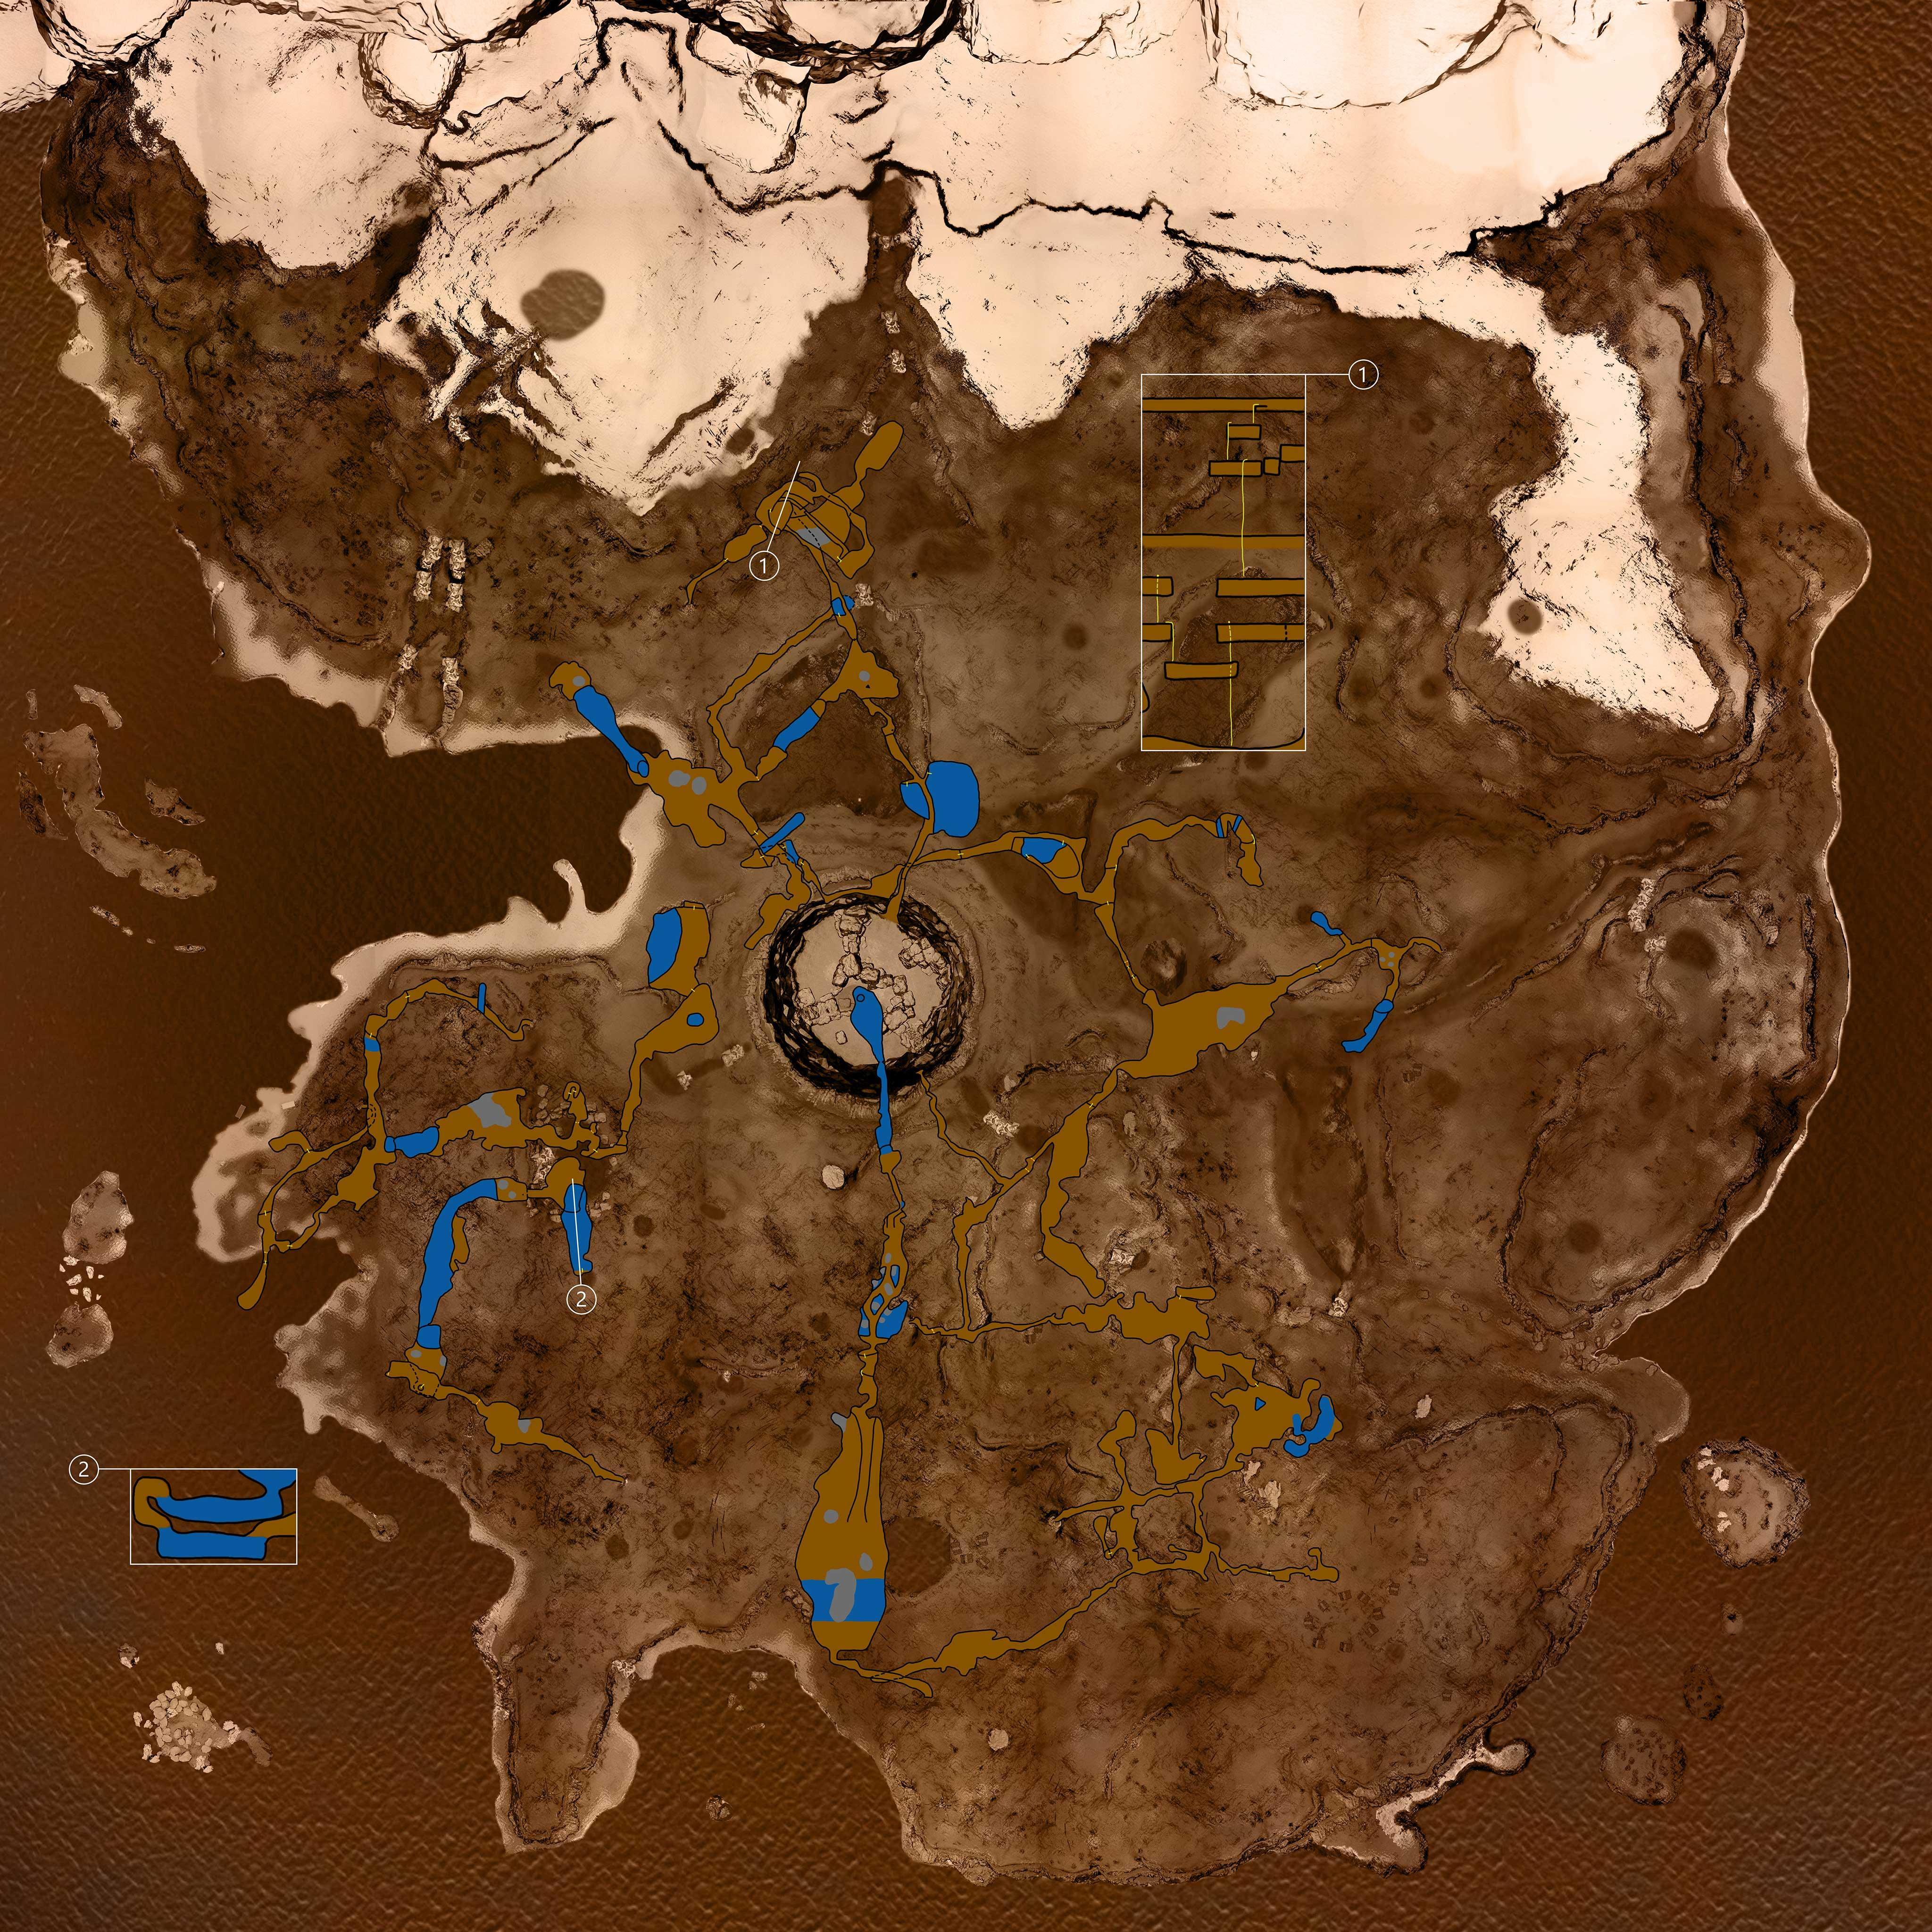

In [14]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./theforestmap-caves.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:3b", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "What is the Dollar-based gross retention rate?", "image": image_b64}
)

print(query_chain)

The dollar-based gross retention rate (DBGR) is a metric used to measure the percentage of revenue retained by a company from its existing customers over a specific period, typically a year. It's calculated by subtracting the revenue lost due to customer churn from the total revenue generated by those customers.

Here's the formula:

DBGR = ((Revenue from Existing Customers in Period 1 - Revenue Lost Due to Churn) / Revenue from Existing Customers in Period 1) x 100

For example, let's say a company has $100 million in revenue from existing customers at the beginning of a period (Period 1), and $80 million is lost due to customer churn. The DBGR would be:

DBGR = (($100 million - $80 million) / $100 million) x 100 = 20%

This means that the company retains 20% of its revenue from existing customers over the period.

The dollar-based gross retention rate is a useful metric because it provides insight into a company's ability to retain customers and generate revenue from those customers.

: 

In [ ]:
%pip install -U langchain-community langgraph langchain-anthropic tavily-python langgraph-checkpoint-sqlite